In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simplemd

## A. Implement in simpleMD a Monte Carlo barostat.

You can place it at the end of the loop (after the second velocity update) as follows,
* scale cell and positions with an appropriate random factor.
* recompute total energy.
* accept or reject the move.

As a test system you can use the LJ crystal that you have in the examples.

### LJ run review 

Barostats will need pressure as an additional parameter to be defined in the `SimpleMD` class. Lennard-Jones pressure (as LJ-units are used in `simplemd`) is given by,
$$
p* = \frac{p\sigma^3}{\varepsilon}
$$
where $\sigma$ and $\varepsilon$ are the characteristic size and energy parameters of the system (and $m$ being the mass of the particle). 

In [ ]:
'''
from __init__.py
Main MD loop - Langevin thermostat & Velocity Verlet integrator

1. thermostat (1)
2. update velocities (1)
3. update positions 
4. eventually recompute neighbor list
5. compute forces 
6. update velocities
6.5 MC Barostat 
7. thermostat (1)
8. readout
'''

'\nfrom __init__.py\nMain MD loop - Langevin thermostat & Velocity Verlet integrator\n\n1. thermostat (1)\n2. update velocities (1)\n3. update positions \n4. eventually recompute neighbor list\n5. compute forces \n6. update velocities\n7. thermostat (1)\n8. readout\n\n\n'

In [3]:
# 1. creates box and coordinates
cells, positions = simplemd.generate_lattice(3)

# Lennard-Jones units
print(positions.shape)
print(cells)

(108, 3)
(5.0388, 5.0388, 5.0388)


In [4]:
# no initial coordinates
keys={
'temperature': 0.722,
'tstep': 0.005,
'forcecutoff': 2.5,
'listcutoff': 3.0,
'nstep': 2000,
'nconfig': 10,
'nstat': 10,
}

keys['cell'] = cells
keys['positions'] = positions

In [5]:
# solution 3.
# create runner
smd=simplemd.SimpleMD(**keys)
# run
smd.run()

Text(0, 0.5, 'energy ($E*$)')

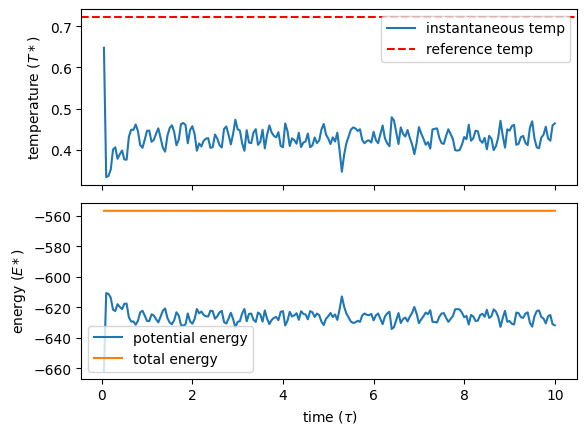

In [6]:
# solution 4.
# plotting instantaneous temperature
time, inst_temp, e_pot, e_tot = np.array(smd.statistics).T[1:5]

fig, ax = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)
ax[0].plot(time, inst_temp, label="instantaneous temp")
ax[0].axhline(y=keys["temperature"], color='r', linestyle='--', label='reference temp')
ax[0].set_ylabel(r'temperature ($T*$)')
ax[0].legend()

ax[1].plot(time, e_pot, label="potential energy")
ax[1].plot(time, e_tot, label="total energy")
ax[1].legend()
ax[1].set_xlabel(r'time ($\tau$)')
ax[1].set_ylabel(r'energy ($E*$)')


## B. Compute the average volume for different values of the external pressure.

## C. Implement long range corrections (isotropic) in the calculation of the total energy.

## D. Compute the average volume at a given external pressure for different values of the force cutoff.

Try to do the calculation with and without long-range corrections and verify which of the two calculations is more sensitive to the value of the force cutoff.

## E. Think about the algorithm for the update of the neighbor list. 

Is it valid also when using the barostat? If not, how should it be changed?